### we are going to use a framework called TensorFlow and Keras. 
### Here we are going to see that how CNN classify an image so precisely which cant be done by ANN.
### if we would have used ANN for a larger image(not just hand written image detection) then we will end up with millions of parameters to be learnt. so to decrese computation(space as well as time) we use CNN. Another downside with ANN was that it treat local pixels same as pixels far apart & it is sensative to location of an object in an image.
#### - 
### since our data is sequential so we will use sequential model.
### from tensorflow ew have imported Dense as we will use fully connected layer after the covolutional layer operations will be over.
### if we have lots of parameters to learn then in that case we need to use drop-out which basically shuts some the randomly picked neurons. dropout is generally a good idea if we are facing an OVERFITTING(high variance case) condition. the value of dropout is manually entred and its a hit and trail method to find the optimum value.
#### -------
### after dropout we have imported activation - This plays a major role in any of the deep learning structure. It generally varies from problem to problem. If we have binary classification problem then we use Sigmoid as our activation function (sigmoid has an issue of VANISHING GARADIANT we have relatively okay result in the range of -3 to +3).... Sign function is also used but the gradiant in sign function vanishes everywhere. if we have classes i-e greater than two (say k classes) then for this we use Softmax function.  To overcome this issue of vanishing gradiant problem researchers come up with ReLu (Rectified Linear Unit  max(o,y)). this solves the problem of vanishing gradiant. There is one more activation function which gives some weightage to the negative values as opposed to ReLu which map negatives to zero. As we know that is 2D so we will use flatten command to make a one dimensional vector (to feed it to the nueral network). 

### now we imported Conv2D--  this will allow us to use 2 dimesional Convolutional Neural Network.
## (A) .....why convolution layer is used???
### Lets say we have a colored image of 1000x1000x3 then the number of input features will be 3Millions and we use 1000(say) number of hidden neurons then the WEIGHT MATRIX will be of dimension (1000, 3M) which is around 3Billions of parameters for the network to learn (think about the RAM requirement or what if the image is slightly large). 
### So we need to impliment CONVOLUTIONAL OPERATION  which is one of the most fundamental building block of CNN.  we apply this operation on the input image & FILTERS f (often called as KERNALS in research papers). Filters are basically used for detecting the edges such as vertical or horizontal edges. we can have several filters which can be used to detect edges at some angles. some of the basic filters we have seen is - vertical edges, horizontal edges, SOBEL filters(this gives weightage to the centre row so its a little bit robust filter), SHAW filter (this is sort of vertical filter but use high values). One thing to note is that all these filter's order is taken as odd(3x3, 5x5). Secondly, we dont choose the values in filter by ourselves.  Lastly, treating the values of the filter as PARAMETERS. we just consider them as parameters and the updation is done using BACK-PROPAGATION with a valid optimizer.  
### we had DOWNSIDEs of using the convolution operation-- 
### 1) everytime we detect the edges the image shrinks which we dont want all the time (specially seen in case of large number of hidden layers)
### 2) All the corner pixels in the input tensor is used only once. Whereas the pixel in the middle overlaps with so many regions of filters while calulation of output. So baisically we are loosing so many corner information. 
### To deal with these downsides researchers come up with PADDING (n+2p-f+1)---- adding rows and columns to the input tensor depending upon the requirement.
### Padding is of two types- ------   (1) VALID (p=0)  (2) SAME (p=k - to make output size same as input). 
### STRIDE-  this is sort of jump we want to take while applying filter with conv operation.


### the same concept is applied to the colored image (3 channels RGB)- just the tensor size will increase. And a thing to note is that the number of channels is same as number of fliter layers. i-e if RGB image say 39x39x3 then filter can be 3x3x3. 

## The steps followed here are- 
### convolutional operation is applied between input and filter (we can take any number of filter)
### we get an output which can be of same dimension if we did padding else it will shrink
### we apply a BIAS to the output which will be our final tensor.
### we apply some sort of NON-LINEARITY (ReLu) to get the Y-hat.... cat or dog
### NOTE: how big the image is we would have constant number of parameters in here---- if we have an image of size 3x3x3. this becomes 27 and a bias so total of 28 parameters. Say we have use 10 filters then we will have 280 PARAMETERS only (independent of size of image).  so we can say that this property makes it LESS PRONE TO OVER FITTING as opposed to simple neural network.
## ----
### so here we took a 39x39x3 size of image and conv it to 7x7x40 size which is equal to 1960. now this will be flatten to make a column vector to take as input to the neural network and finally it is fet to the logistic/softmax unit.
### number of HYPERPARAMETERS are- 
### Filter size
### Stride
### Padding
### Number of filters.

### experiment shows that there is decrease in the image size and increase in channel size as we go on applying CONV. 



# -

#### we can design pretty goood neural network using just convolutional layer but we found in most of the architectures we have pooling layer too.
## (B) .... Why pooling layer is used  ........  [(n+2p-f)/s +1]
#### To reduce the size of representation
#### to increase the speed of computation
#### To detect some features in a more robust way
### it has two types --- Max pooling and mean/average pooling 

#### in max pooling we choose maximum pixwel in the space we overlap as we did with filter.
#### in case of average pooling we take mean of all the pixel values.
#### it has hyperparameters to tune BUT IT DONOT HAVE PARAMETERS TO LEARN. So once you fixed the size of f & s its a FIXED COMPUTATION and Gradiant Descent dont change anything.
## (C) fully connected layer
#### after getting the output as 5x5x16(say) we flatten this and feed to the neurons and now here fully connected layers comes into the picture. we can use hidden layers with our convience. and one output layer is considered. 


## Two advantages of using convolutional layer over just using fully connected layers are :- 
#### (1) PARAMETER SHARING :- number of parameters is reduced because of CONV layer and then it is fed to the fully connected layer easily.
#### (2) SPARCITY IN CONNECTION  :- In each layer, every output depends only on a small portion of input. 
#### ---
#### Because of less number of parameters now we are LESS PRONE TO OVERFITTING. 
#### as we have used weight matrix W and a bias b so we are going to define a COST FUNCTION to track the loss and by using Gradiant Descent or RMSProp or ADAM optimizer we cab optimize the prameteres to reduce J.


#### Till here we looked at the building block of Convolutional Neural Network, later we will see some classical networks :- LeNet5, AlexNet & VGG. lastly we will explore ResNet which is specially used for deeep neural network 150 layers or more. 















In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#### sequential allow us to build an architecture for a Neural Network. we need to convert our data into catagorical to feed it into the model. the dataset we are using is MNIST. 

In [5]:
# loading the data and splitting into train and test tuples
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)
# 60000 data or row of images which are 28x28 in training data

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# lets see the image at the 1st index in training data
X_train[0]
# here we can see the maximum pixel is 255 and least is zero. 
# numpy array - pixle value is given 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# printing the label of image   so the above numpy array represent 5
y_train[0]

5

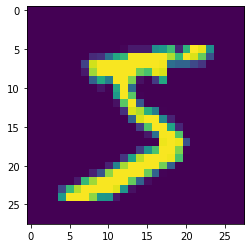

In [9]:
# lets print the image-- we get a 28x28 image of digit 5
plt.imshow(X_train[0])

In [10]:
# reshaping the data of X  -- 1 represent grey scale 
X_train  = X_train.reshape(60000,28,28,1)

X_test  = X_test.reshape(10000,28,28,1)

In [11]:
# processing y data set using one hot encoding:label to set of 10 numbers to feed to the neural network in the output layer
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# print the new label
print(y_train_one_hot[0])    # 1st element was 5 so one at fifth index

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# building CNN model
model = Sequential()

# adding model layers   (60 channels, i am inc it to 120 in 2nd layer to see what will happen, the coder halfed it but i think it should increase as )
model.add(Conv2D(60, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(120, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [15]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# model training 
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 208s 111ms/step - loss: 0.3511 - accuracy: 0.9552 - val_loss: 0.0870 - val_accuracy: 0.9744
Epoch 2/2
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0980 - val_accuracy: 0.9723


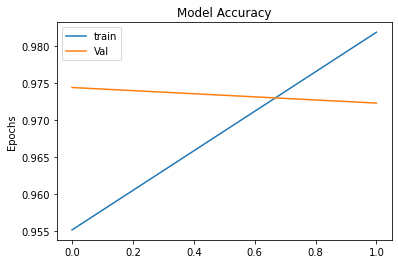

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [22]:
# lets show the predictions for the firrst 4 images in the test set 
predictions = model.predict(X_test[:4])
predictions

# each grp show prob of preticting a digit

array([[3.81076148e-08, 4.67399184e-14, 4.34259881e-08, 1.09014778e-07,
        3.02278479e-14, 6.57915167e-10, 6.47574142e-18, 9.99999762e-01,
        4.02482065e-08, 3.71440351e-10],
       [9.11651128e-08, 8.24934232e-10, 9.99998689e-01, 2.61426487e-13,
        1.52891124e-14, 1.01200295e-14, 1.13950910e-06, 5.64623851e-16,
        2.52484367e-10, 2.63340849e-16],
       [1.04267583e-05, 9.95462239e-01, 2.53005273e-05, 3.44897124e-08,
        2.69001961e-04, 7.83643645e-06, 3.39166654e-05, 2.41808831e-08,
        4.19095019e-03, 2.63673826e-07],
       [9.99983907e-01, 1.04237896e-10, 9.52850687e-09, 5.31515912e-13,
        3.54160867e-11, 5.93259719e-10, 1.55892267e-05, 5.46715485e-11,
        3.48866003e-09, 4.15084770e-07]], dtype=float32)

In [23]:
# print our predictions as number labels for the first 4 images
print(np.argmax(predictions, axis=1))
# print the actual labels 
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


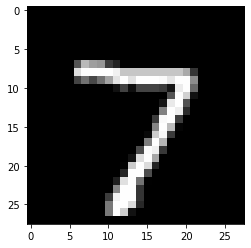

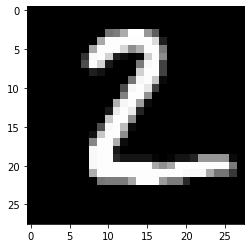

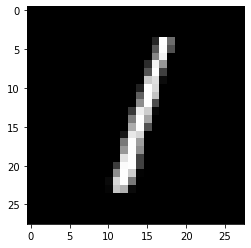

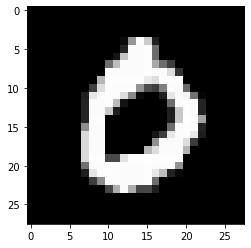

In [24]:
# show the first 4 images as pictures 
for i in range(0,4):
    image = X_test[i]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

#### Here we can see that we can get a pretty decent accuracy with the application of convolutional neural network. though we can tune the hyper parameters to get better results. One more thing can be dine and that is addition of pooling layer which we reduce the computation time.